<a href="https://colab.research.google.com/github/rmontteiro/proesam/blob/main/clustering_vulnerabilidade_ambiental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#lendo o csv uso do solo
df_matriz = pd.read_excel('/content/matriz_processamento_final.xlsx')

In [3]:
df_matriz.head(10)

,Municipio,Numero de Dias,Percentual de Cobertura Florestal
0,Afonso Claudio,450,0.169908
1,Agua Doce do Norte,720,0.091074
2,Aguia Branca,900,0.123253
3,Alegre,1440,0.112549
4,Alfredo Chaves,1080,0.388007
5,Alto Rio Novo,540,0.065580
6,Anchieta,180,0.153594
7,Apiaca,450,0.085662
8,Aracruz,540,0.169704
9,Atilio Vivacqua,270,0.156855


In [5]:
municipios= df_matriz['Municipio'].values

In [6]:
municipios

array(['Afonso Claudio', 'Agua Doce do Norte', 'Aguia Branca', 'Alegre',
       'Alfredo Chaves', 'Alto Rio Novo', 'Anchieta', 'Apiaca', 'Aracruz',
       'Atilio Vivacqua', 'Baixo Guandu', 'Barra de São Francisco',
       'Boa Esperança', 'Bom Jesus do Norte', 'Brejetuba',
       'Cachoeiro de Itapemirim', 'Cariacica', 'Castelo', 'Colatina',
       'Conceição da Barra', 'Conceição do Castelo',
       'Divino São Lourenço', 'Domingos Martins', 'Dores do Rio Preto',
       'Ecoporanga', 'Fundão', 'Governador Lindenberg', 'Guaçuí',
       'Guarapari', 'Ibatiba', 'Ibiraçú', 'Ibitirama', 'Iconha', 'Irupi',
       'Itaguaçu', 'Itapemirim', 'Itarana', 'Iúna', 'Jaguare',
       'Jeronimo Monteiro', 'João Neiva', 'Laranja da Terra', 'Linhares',
       'Mantenópolis', 'Marataízes', 'Marechal Floriano', 'Marilândia',
       'Mimoso do Sul', 'Montanha', 'Mucurici', 'Muniz Freire', 'Muqui',
       'Nova Venécia', 'Pancas', 'Pedro Canário', 'Pinheiros', 'Piúma',
       'Ponto Belo', 'Presidente Ken

In [8]:
df_matriz.columns = ['Municipio','Dias_eventos_extremos','Cobertura_florestal_%']

In [7]:
df_matriz.head(10)

,Municipio,Numero de Dias,Percentual de Cobertura Florestal
0,Afonso Claudio,450,0.169908
1,Agua Doce do Norte,720,0.091074
2,Aguia Branca,900,0.123253
3,Alegre,1440,0.112549
4,Alfredo Chaves,1080,0.388007
5,Alto Rio Novo,540,0.065580
6,Anchieta,180,0.153594
7,Apiaca,450,0.085662
8,Aracruz,540,0.169704
9,Atilio Vivacqua,270,0.156855


In [9]:
print(df_matriz)

             Municipio  Dias_eventos_extremos  Cobertura_florestal_%
0       Afonso Claudio                    450               0.169908
1   Agua Doce do Norte                    720               0.091074
2         Aguia Branca                    900               0.123253
3               Alegre                   1440               0.112549
4       Alfredo Chaves                   1080               0.388007
..                 ...                    ...                    ...
73               Viana                    540               0.285345
74          Vila Pavão                   1260               0.096413
75        Vila Valério                    720               0.119575
76          Vila Velha                    540               0.093993
77             Vitória                    900               0.189883

[78 rows x 3 columns]


In [10]:
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;

In [ ]:
import plotly.express as px
fig  = px.scatter(df_matriz, x = 'Cobertura_florestal_%',opacity=0.5, y = 'Dias_eventos_extremos', hover_name = 'Municipio', log_y = False, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Matriz de Dispersão dos Indicadores')
fig.update_xaxes(title = 'Cobertura Florestal (% da Area)')
fig.update_yaxes(title = 'Dias em Situação Anromal')
fig.show()

In [11]:
df2_matriz =df_matriz.drop('Municipio', axis=1)

In [12]:
#NORMALIZANDO OS VALORES ENTRE 0 E 1
import pandas as pd
from sklearn import preprocessing

#df_normal=(df2_matriz-df2_matriz.mean())/df2_matriz.std()
df_normal=(df2_matriz-df2_matriz.min())/(df2_matriz.max()-df2_matriz.min())

In [13]:
df_normal

,Dias_eventos_extremos,Cobertura_florestal_%
0,0.20,0.359567
1,0.35,0.182591
2,0.45,0.254830
3,0.75,0.230802
4,0.55,0.849185
...,...,...
73,0.25,0.618716
74,0.65,0.194577
75,0.35,0.246574
76,0.25,0.189144


In [15]:
df2_normal_labels =df_normal.assign(Municipios=6)

In [16]:
vector = df_normal.values

In [17]:
import plotly.express as px
fig  = px.scatter(df_normal, x = 'Cobertura_florestal_%',opacity=0.5, y = 'Dias_eventos_extremos', log_y = False, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Matriz de Dispersão dos Indicadores')
fig.update_xaxes(title = 'Cobertura Florestal (% da Area)')
fig.update_yaxes(title = 'Dias em Situação Anromal')
fig.show()

Preparando o Data Frame para o modelo

KMEANS
Vamos aplicar o primeiro modelo de classificação: o k-nearest neighbors!

In [18]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans

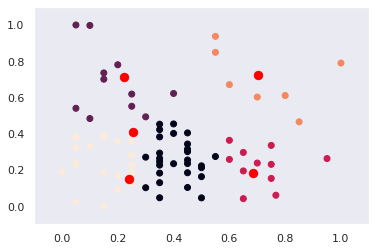

In [19]:
kmeans = KMeans(n_clusters = 5, #numero de clusters
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300) #numero máximo de iterações
pred_y = kmeans.fit_predict(vector)
plt.scatter(vector[:,0], vector[:,1], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-0.1, 1.1) #range do eixo x
plt.ylim(-0.1, 1.1) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [22]:
print(vector)

[[0.2        0.35956685]
 [0.35       0.18259134]
 [0.45       0.25483026]
 [0.75       0.23080164]
 [0.55       0.84918528]
 [0.25       0.12535832]
 [0.05       0.32294404]
 [0.2        0.17044187]
 [0.25       0.35911062]
 [0.1        0.33026561]
 [0.25       0.22650309]
 [0.35       0.22677553]
 [0.35       0.12983409]
 [0.5        0.21238034]
 [0.05       0.2416398 ]
 [0.65       0.29658477]
 [0.8        0.61061424]
 [0.85       0.46556145]
 [0.7        0.23811259]
 [0.35       0.42237376]
 [0.25       0.55149039]
 [0.05       0.5402816 ]
 [1.         0.78986658]
 [0.15       0.39082542]
 [0.2        0.09094512]
 [0.05       0.38542759]
 [0.45       0.31459081]
 [0.45       0.23517928]
 [0.6        0.67082738]
 [0.15       0.18592498]
 [0.3        0.49300809]
 [0.4        0.62200711]
 [0.05       0.22958086]
 [0.5        0.22258557]
 [0.05       0.37896755]
 [0.75       0.15316303]
 [0.4        0.4539219 ]
 [0.4        0.40152657]
 [0.15       0.38085874]
 [0.45       0.18453537]


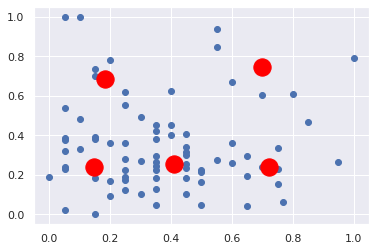

In [23]:
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(vector)
plt.scatter(vector[:,0], vector[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'random')
kmeans.fit(vector)
kmeans.cluster_centers_

array([[0.72222222, 0.24173899],
       [0.7       , 0.74335966],
       [0.40892857, 0.25598732],
       [0.18181818, 0.68393289],
       [0.14761905, 0.23984652]])

In [25]:
#calcula a distância de cada ponto para cada um dos centroides dos clusters
distance = kmeans.fit_transform(vector)
distance


array([[0.62473805, 0.32487521, 0.13067793, 0.52897162, 0.23319491],
       [0.63991135, 0.52879908, 0.21032405, 0.36268745, 0.09412516],
       [0.52453252, 0.50601438, 0.30275197, 0.26274259, 0.04108772],
       [0.47373494, 0.72674515, 0.60244885, 0.04050226, 0.34200006],
       [0.22485824, 0.40356685, 0.7302083 , 0.64801184, 0.60974172],
       [0.7461194 , 0.56272045, 0.15358844, 0.4705107 , 0.20572367],
       [0.77186254, 0.38430323, 0.1281978 , 0.66836613, 0.36512042],
       [0.74580458, 0.51381281, 0.08695269, 0.51314171, 0.22576353],
       [0.58392548, 0.33190099, 0.15718074, 0.48075409, 0.1894537 ],
       [0.72498789, 0.36300793, 0.10219191, 0.62023652, 0.31773279],
       [0.67077356, 0.46248328, 0.10324682, 0.46063442, 0.16164038],
       [0.60447625, 0.48711187, 0.20280262, 0.36064625, 0.06577162],
       [0.68355809, 0.5790601 , 0.23034927, 0.3720477 , 0.13923798],
       [0.538888  , 0.5688598 , 0.35344975, 0.21079875, 0.10097313],
       [0.81504118, 0.46151838, 0.

In [26]:
labels = kmeans.labels_
labels

array([2, 4, 4, 3, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 3, 0, 0, 3, 4, 1, 1,
       0, 2, 2, 2, 4, 4, 0, 2, 1, 1, 2, 4, 2, 3, 4, 4, 2, 4, 4, 4, 1, 4,
       2, 1, 4, 4, 3, 3, 4, 3, 2, 4, 4, 4, 4, 2, 2, 2, 4, 0, 1, 1, 4, 3,
       4, 4, 3, 3, 1, 1, 0, 1, 3, 4, 2, 4], dtype=int32)

In [27]:
df_distancia_cluster = pd.DataFrame(distance)
df_distancia_cluster


,0,1,2,3,4
0,0.624738,0.324875,0.130678,0.528972,0.233195
1,0.639911,0.528799,0.210324,0.362687,0.094125
2,0.524533,0.506014,0.302752,0.262743,0.041088
3,0.473735,0.726745,0.602449,0.040502,0.342000
4,0.224858,0.403567,0.730208,0.648012,0.609742
...,...,...,...,...,...
73,0.479023,0.094350,0.392459,0.608297,0.396018
74,0.514084,0.677247,0.504416,0.066273,0.248770
75,0.588982,0.468581,0.202493,0.361484,0.059676
76,0.697844,0.499464,0.114248,0.461734,0.172413


In [ ]:

df_distancia_cluster=df_distancia_cluster.assign(municipios)